# Project 4: West Nile Virus Prediction


## Contents:
- [Data](#Data)
- [Model](#Model)
- [Feature reduction](#Feature-reduction)
- [Feature extraction](#Feature-extraction)
- [Predicted locations](#Predicted-locations)
- [Conclusions](#Conclusions)


In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (RidgeCV, 
                                  LassoCV, 
                                  ElasticNetCV, 
                                  LogisticRegressionCV,
                                  LinearRegression,
                                  LogisticRegression)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, 
                             plot_confusion_matrix, 
                             roc_auc_score, 
                             plot_roc_curve, 
                             accuracy_score,
                            )
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC

import xgboost as xgb
import time
import warnings
warnings.filterwarnings('ignore')

# Data

**Data** 
* train_set.csv: this is the training dataset
* test_set.csv: this is the test dataset

In [2]:
train = pd.read_csv('../data/train_set.csv')


In [3]:
test = pd.read_csv('../data/test_set.csv')


In [4]:
# preview train set
train

,date,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,...,avgspeed,temp_diff,week,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal
0,2007-05-29,1.0,41.688324,-87.676709,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
1,2007-05-29,1.0,41.720848,-87.666014,9,3,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
2,2007-05-29,1.0,41.731922,-87.677512,8,5,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
3,2007-05-29,1.0,41.732984,-87.649642,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
4,2007-05-29,1.0,41.862292,-87.648860,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,2,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,1,1,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8458,2013-09-26,3.0,41.973845,-87.805059,9,1,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8459,2013-09-26,3.0,41.974689,-87.890615,9,37,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0


In [5]:
train.shape

(8461, 31)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8461 entries, 0 to 8460
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8461 non-null   object 
 1   species_nr         8461 non-null   float64
 2   latitude           8461 non-null   float64
 3   longitude          8461 non-null   float64
 4   addressaccuracy    8461 non-null   int64  
 5   nummosquitos       8461 non-null   int64  
 6   wnvpresent         8461 non-null   int64  
 7   trap_rank          8461 non-null   int64  
 8   tmax               8461 non-null   float64
 9   tmin               8461 non-null   float64
 10  tavg               8461 non-null   float64
 11  depart             8461 non-null   float64
 12  dewpoint           8461 non-null   float64
 13  wetbulb            8461 non-null   float64
 14  sunrise            8461 non-null   float64
 15  sunset             8461 non-null   float64
 16  preciptotal        8461 

In [7]:
# change date to numerical
train['date'] = pd.to_datetime(train['date'])

In [8]:
# preview test set
test.head()

,id,date,latitude,longitude,addressaccuracy,species_nr,trap_rank,tmax,tmin,tavg,...,avgspeed,temp_diff,week,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal
0,1,2008-06-11,41.95469,-87.800991,9,2.0,0,86.0,63.5,74.75,...,10.2,9.75,24.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095
1,2,2008-06-11,41.95469,-87.800991,9,1.0,0,86.0,63.5,74.75,...,10.2,9.75,24.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095
2,3,2008-06-11,41.95469,-87.800991,9,3.0,0,86.0,63.5,74.75,...,10.2,9.75,24.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095
3,4,2008-06-11,41.95469,-87.800991,9,0.0,0,86.0,63.5,74.75,...,10.2,9.75,24.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095
4,5,2008-06-11,41.95469,-87.800991,9,0.0,0,86.0,63.5,74.75,...,10.2,9.75,24.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095


In [9]:
test.shape

(116293, 30)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 116293 non-null  int64  
 1   date               116293 non-null  object 
 2   latitude           116293 non-null  float64
 3   longitude          116293 non-null  float64
 4   addressaccuracy    116293 non-null  int64  
 5   species_nr         116293 non-null  float64
 6   trap_rank          116293 non-null  int64  
 7   tmax               116293 non-null  float64
 8   tmin               116293 non-null  float64
 9   tavg               116293 non-null  float64
 10  depart             116293 non-null  float64
 11  dewpoint           116293 non-null  float64
 12  wetbulb            116293 non-null  float64
 13  sunrise            116293 non-null  float64
 14  sunset             116293 non-null  float64
 15  preciptotal        116293 non-null  float64
 16  st

In [11]:
# change date to numerical
test['date'] = pd.to_datetime(test['date'])

In [12]:
# baseline score
train['wnvpresent'].value_counts()

0     8004
1      409
2       31
3        9
4        2
8        1
9        1
10       1
5        1
6        1
7        1
Name: wnvpresent, dtype: int64

In [13]:
# convert to binary
# 0 means no wnv detected
# 1 means wnv detected
def rebin_wnvpresent(row): 
    if row['wnvpresent'] > 0:
        row['wnvpresent'] = 1
    else:
        row['wnvpresent'] = 0
    return row

In [14]:
train = train.apply(rebin_wnvpresent,axis=1)

In [15]:
train['wnvpresent'].value_counts()

0    8004
1     457
Name: wnvpresent, dtype: int64

# Model

## Baseline model (with SMOTE)

Let's just start with modeling using one feature. Since 'trap_rank', 'species_nr' has the largest correlation to 'wnvpresent', one of the features will be used. Simplest classification method would be the logistic regression model. 

In [16]:
X_sm = train[['species_nr']]
y_sm = train[['wnvpresent']]

In [17]:
y=train[['wnvpresent']]

In [18]:
# split data
Xsm_train, Xsm_valid, ysm_train, ysm_valid = train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 42, stratify =y)

In [19]:
# scaling
ss = StandardScaler()

Xsm_train_sc = ss.fit_transform(Xsm_train)
Xsm_valid_sc = ss.transform(Xsm_valid)

In [20]:
# instantiate
lr = LogisticRegression()

# fit model
lr.fit(Xsm_train_sc, ysm_train)

# score
lr.score(Xsm_train_sc, ysm_train), lr.score(Xsm_valid_sc, ysm_valid)

(0.9460127028934369, 0.9459362692445399)

In [21]:
ysm_train.value_counts()

wnvpresent
0             5362
1              306
dtype: int64

Using only one feature, regardless which one feature, would result in high R2 score. This is because the predictive feature is imbalanced in the training set.

**with SMOTE**

In [22]:
# create synthetic data for training set

smote = SMOTE()

# Xsmote_train, ysmote_train = smote.fit_sample(Xsm_train_sc, ysm_train)
Xsmote_train, ysmote_train = smote.fit_resample(Xsm_train_sc, ysm_train)

In [23]:
smote.fit

<bound method SamplerMixin.fit of SMOTE()>

In [24]:
ysmote_train.value_counts()

wnvpresent
0             5362
1             5362
dtype: int64

Now, the predictive feature is more balanced.

In [25]:
# instantiate
lr2 = LogisticRegression()

# fit model
lr2.fit(Xsmote_train, ysmote_train)

# score
lr2.score(Xsmote_train, ysmote_train), lr2.score(Xsm_valid_sc, ysm_valid)

(0.5966989929130921, 0.7608306480486932)

However, the above scores where training score < test scores suggest significant underfitting. Ways to counteract this is to increase features (have more feature selection) or use a more complex model.

### Logistic regression model (with SMOTE)

In [26]:
# columns of train with polynomial features
train

,date,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,...,avgspeed,temp_diff,week,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal
0,2007-05-29,1.0,41.688324,-87.676709,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
1,2007-05-29,1.0,41.720848,-87.666014,9,3,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
2,2007-05-29,1.0,41.731922,-87.677512,8,5,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
3,2007-05-29,1.0,41.732984,-87.649642,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
4,2007-05-29,1.0,41.862292,-87.648860,8,1,0,0,88.0,62.5,...,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,2,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,1,1,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8458,2013-09-26,3.0,41.973845,-87.805059,9,1,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0
8459,2013-09-26,3.0,41.974689,-87.890615,9,37,0,0,75.0,52.5,...,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0


In [27]:
X = train.drop(columns=['date','wnvpresent','nummosquitos'])
y = train[['wnvpresent']]

In [28]:
# split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify =y)

In [29]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('logreg', LogisticRegression(max_iter=1_000, solver='saga'))
    ])

In [30]:
# regardless of parameters, there is overfitting.
pipe_params = {
    'sampling__sampling_strategy': ['minority', 'not minority', 'auto'],
    'sampling__k_neighbors': [250],   # tried 1-10000
    'logreg__penalty': ['l2', 'l1'],   # tried 'l2', 'l1', 'elastinet'
    'logreg__C': [1] # tried 1-20
}

In [31]:
grid = GridSearchCV(pipe, pipe_params, scoring='roc_auc', n_jobs=-1)

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('sampling', SMOTE()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [1], 'logreg__penalty': ['l2', 'l1'],
                         'sampling__k_neighbors': [250],
                         'sampling__sampling_strategy': ['minority',
                                                         'not minority',
                                                         'auto']},
             scoring='roc_auc')

In [33]:
grid.best_params_

{'logreg__C': 1,
 'logreg__penalty': 'l2',
 'sampling__k_neighbors': 250,
 'sampling__sampling_strategy': 'not minority'}

In [34]:
grid.score(X_train, y_train), grid.score(X_valid, y_valid)

(0.9999744022935545, 1.0)

Regardless of pipe_params used, there is overfitting. There is a lot of multicollinearity, and features have to be dropped before modeling.
<br>
<br> Since there might be too many variables with high multicollinearity, we need to reduce number of features and/or utilise PCA to transform the data first. We approached this based on **feature reduction** and **feature extraction**. 

## Feature reduction

We conduct several models based on a reduced number of features.

**Drop Column: ```Week``` & ```Date```**

While our graphs had provided meaningful visualization as to the prevalence of mosquitos and presence of WNV in weekly periods, we have dropped this variable in testing our logistic models. Mosquitos do not adhere to our human-based calendar groupings such as 'week' and 'date'; their activities are influenced by weather patterns. Due to climate change, weather patterns have shifted such that static human-based calendar groupings are not a precise indicator of seasons. For instance, while 'Summer' starts on June 21, the weather in June 21, 1990 is different than that of June 21, 2021. As static human-based groupings do not affect mosquito life cycle and activity, we believe that excluding such features would provide us with more accurate results.

We had also taken an into account our preliminary models in dropping these columns. In running our preliminary models including human-based calendar groupings, we found that as the most important feature, 'week' held a significant weight (143x) when compared to the second and third-most important feature, wetbulb and stnpressure (35x and 17x respectively). This means that as week increases by one, the probability of a trap capturing a WNV-infected mosquito is 143 times more likely, whereas an increase in one degree (Fahrenheit) in wetbulb or an increase of one inch in mercury-based measurement (Hg) results in a 35x and 17x likelihood of a WNV mosquito being present. Due to this massive difference in magnitude between the most important feature as compared to the rest, we believe that it is unwise to include the 'week' feature in our model.


**Drop Columns: ```Wnvpresent``` & ```Nummosquitos```**

We dropped the columns ```wnvpresent``` and ```nummosquitos``` as they are our target variables and should not be included in our training set.

**Drop Columns: ```Tmin``` & ```Tmax```**

We dropped the columns ```Tmin``` and ```Tmax``` due to multicollinearity with ```Tavg```. We believe that ```Tavg``` provides us a better gauge of the day's temperature rather than using the minimum and maximum temperature of the day.

**Drop Column: ```trap_rank```**

We dropped ```trap_rank``` as this is our engineered feature based on our target variables. Including this feature in our model would result in leakage to our data and this will result in an overfitting of our training models

In [35]:
X = train.drop(columns=['week', 'date', 'wnvpresent', 'nummosquitos',
                        'tmin', 'tmax', 'trap_rank'])

y = train['wnvpresent'].map(lambda x:0 if x == 0 else 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y
                                                   )

In [37]:
kaggle_X = test[['species_nr', 'latitude', 'longitude', 'addressaccuracy', 'tavg', 
                 'depart', 'dewpoint', 'wetbulb', 'sunrise', 'sunset', 'preciptotal', 
                 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 
                 'temp_diff', 'year', 'FG', 'TS', 'lag_1_tavg', 'lag_2_tavg', 
                 'lag_1_preciptotal', 'lag_2_preciptotal']]

### Loop models

In [38]:
result = pd.DataFrame()
result_columns = ['Model', 'Accuracy', 'Specificity', 'Sensitivity', 'ROC_AUC']


In [39]:
def gs_model(gs_name, model_name):
    global result
    duration = time.time()
    gs_name.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_test, gs_name.predict(X_test)).ravel()
    accuracy = round((tp+tn)/(tn+fp+fn+tp),3)*100 
    sensitivity = round((tp)/(tp+fn),3)*100
    specificity = round(tn/(tn+fp),3)*100
    roc_auc = round(roc_auc_score(y_test, gs_name.best_estimator_.predict(X_test)),3)
    
    result_new = pd.DataFrame([model_name, 
                               accuracy,
                               specificity,
                               sensitivity,
                               roc_auc
                               ], index=result_columns).T
    
    result = pd.concat(objs=(result, result_new), axis=0)
    
    plot_confusion_matrix(gs_name, 
                          X_test, y_test, 
                          cmap='Blues', 
                          values_format='d',
                          display_labels=['No WNV', 'WNV']
                         );
    plt.title(model_name)
    print(f'Model Best Params: {gs_name.best_params_}')
    print(f'Process took {round((time.time()-duration)/60,1)} minutes')
    return result.set_index('Model')

### Logistic Classifier Models

We conduct several classifier models based on different penalization methods and classifier models.

#### SS, Smote, Logistic (Ridge)

In [40]:
smote = SMOTE()
ss = StandardScaler()
logit = LogisticRegressionCV()

pipe_ss_smote_logit_ridge = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('logit', logit),
])

pipe_ss_smote_logit_ridge_params = {
    'smote__k_neighbors': [5], # 3, 10, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'logit__cv': [15], #5, 10, 20, 25
    'logit__n_jobs': [-1],
    'logit__random_state': [42],
    'logit__scoring': ['roc_auc'],
    'logit__solver': ['saga'],
    'logit__max_iter': [10_000],
}

gs_ss_smote_logit_ridge = GridSearchCV(
    estimator=pipe_ss_smote_logit_ridge,
    param_grid=pipe_ss_smote_logit_ridge_params,
    scoring='roc_auc',
    cv=5
)

Model Best Params: {'logit__cv': 15, 'logit__max_iter': 10000, 'logit__n_jobs': -1, 'logit__random_state': 42, 'logit__scoring': 'roc_auc', 'logit__solver': 'saga', 'smote__k_neighbors': 5, 'smote__n_jobs': -1, 'smote__random_state': 42, 'smote__sampling_strategy': 'minority'}
Process took 1.0 minutes


,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731


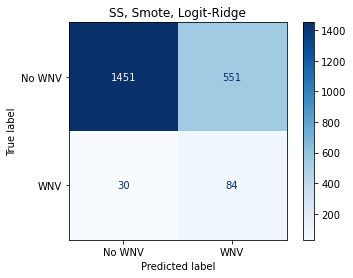

In [41]:
gs_model(gs_ss_smote_logit_ridge, 'SS, Smote, Logit-Ridge')

**Observations and Interpretation of Feature Importance**


In [42]:
feat_impt = pd.DataFrame(
    gs_ss_smote_logit_ridge.best_estimator_['logit'].coef_[0], 
    index=X_train.columns)

logit_ridge_head = pd.DataFrame(np.exp(feat_impt[0].sort_values(ascending=False).head(5))).T
logit_ridge_tail = pd.DataFrame(np.exp(feat_impt[0].sort_values(ascending=False).tail(5))).T

display(logit_ridge_head, logit_ridge_tail)

,sunrise,temp_diff,tavg,wetbulb,stnpressure
0,13.564643,5.285333,5.285333,2.250174,2.187374


,preciptotal,longitude,sealevel,dewpoint,depart
0,0.669538,0.58882,0.583417,0.364087,0.074038


We find that the features we used to create out models have differing magnitudes of impact.
As the sun rises later, there is a much higher likelihood of observing a WNV-infected mosquito.
In any given day, an increase in one minute in the sunrise time results in a 13.6x likelihood of a WNV-infected mosquito to be found.
An increase of 1 Fahrenheit in average temperature results in a 5.3x likelihood of a WNV-infected mosquito to be found.
Precipitation negatively affects the likelihood of observing a WNV-infected mosquito.
An increase in precipitation by 1 inch results in a 0.67x likelihood of a WNV-infected mosquito to be found.
The positive relationship in average temperature and inverse relationship in precipitation is similar to that we have identified in our previous EDA.

#### SS, Smote, Logistic (Lasso)

In [43]:
smote = SMOTE()
ss = StandardScaler()
logit = LogisticRegressionCV()

pipe_ss_smote_logit_lasso = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('logit', logit),
])

pipe_ss_smote_logit_lasso_params = {
    'smote__k_neighbors': [3], # 5, 10, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'logit__cv': [20], # 5, 10, 15, 25
    'logit__n_jobs': [-1],
    'logit__random_state': [42],
    'logit__scoring': ['roc_auc'],
    'logit__solver': ['saga'],
    'logit__max_iter': [10_000],
    'logit__penalty': ['l1'],
}

gs_ss_smote_logit_lasso = GridSearchCV(
    estimator=pipe_ss_smote_logit_lasso,
    param_grid=pipe_ss_smote_logit_lasso_params,
    scoring='roc_auc',
    cv=5
)

Model Best Params: {'logit__cv': 20, 'logit__max_iter': 10000, 'logit__n_jobs': -1, 'logit__penalty': 'l1', 'logit__random_state': 42, 'logit__scoring': 'roc_auc', 'logit__solver': 'saga', 'smote__k_neighbors': 3, 'smote__n_jobs': -1, 'smote__random_state': 42, 'smote__sampling_strategy': 'minority'}
Process took 1.9 minutes


,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738


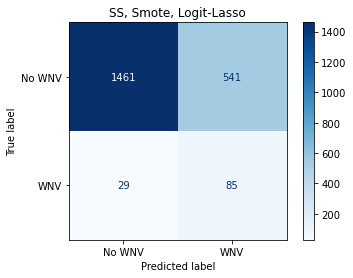

In [44]:
gs_model(gs_ss_smote_logit_lasso, 'SS, Smote, Logit-Lasso')

**Observations and Interpretation of Feature Importance**

In [45]:
feat_impt = pd.DataFrame(
    gs_ss_smote_logit_lasso.best_estimator_['logit'].coef_[0], 
    index=X_train.columns)

logit_lasso_head = pd.DataFrame(np.exp(feat_impt[0].sort_values(ascending=False).head(5))).T
logit_lasso_tail = pd.DataFrame(np.exp(feat_impt[0].sort_values(ascending=False).tail(5))).T

display(logit_lasso_head, logit_lasso_tail)

,sunrise,temp_diff,tavg,stnpressure,TS
0,13.020677,5.511193,5.511193,3.191687,1.981297


,preciptotal,longitude,dewpoint,sealevel,depart
0,0.66596,0.570535,0.414168,0.362066,0.072401


We find that the features we used to create out models have differing magnitudes of impact.
As the sun rises later, there is a much higher likelihood of observing a WNV-infected mosquito.
In any given day, an increase in one minute in the sunrise time results in a 13x likelihood of a WNV-infected mosquito to be found.
An increase of 1 Fahrenheit in average temperature results in a 5.5x likelihood of a WNV-infected mosquito to be found.
Precipitation negatively affects the likelihood of observing a WNV-infected mosquito.
An increase in precipitation by 1 inch results in a 0.67x likelihood of a WNV-infected mosquito to be found.
The positive relationship in average temperature and inverse relationship in precipitation is similar to that we have identified in our previous EDA.

#### Logistic Classifier Model Combined

In [46]:
logit_combined_head = pd.concat(objs=(logit_ridge_head, logit_lasso_head), axis=0).reset_index(drop=True)
logit_combined_head.index = ['Ridge Head', 'Lasso Head']

logit_combined_tail = pd.concat(objs=(logit_ridge_tail, logit_lasso_tail), axis=0).reset_index(drop=True)
logit_combined_tail.index = ['Ridge Tail', 'Lasso Tail']

display(logit_combined_head)
display(logit_combined_tail)

,sunrise,temp_diff,tavg,wetbulb,stnpressure,TS
Ridge Head,13.564643,5.285333,5.285333,2.250174,2.187374,NaN
Lasso Head,13.020677,5.511193,5.511193,NaN,3.191687,1.981297


,preciptotal,longitude,sealevel,dewpoint,depart
Ridge Tail,0.669538,0.588820,0.583417,0.364087,0.074038
Lasso Tail,0.665960,0.570535,0.362066,0.414168,0.072401


**Feature Importance Comparison**

We compare the feature importances of the top 5 heads and tails between our model.

We find that 4 out of the top 5 head features used in the logistic classification model are identical.
However, there is a difference in magnitude of effect. The magnitudes in the lasso features are more evenly distributed than the ridge feature importances.
The difference in magnitude is caused by the different types of penalization between the two regularization models.
We find that all of the top tail features used in the logistic classification model are identical.
However, similar to #2, there is a difference in the magnitude of effect. 

In [47]:
display(result.set_index('Model'))

,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738


**Model Comparison**

We observe the metrics in our observations and find that our L1 penalized model consistently performs better in our metrics of concern: Specificity and ROC_AUC. As we expand our model to include other potential metrics that may be of relevance, we find that our lasso model still performs better for accuracy and specificity. Running our models on Kaggle for testing, we obtain the following result:

|Model|Sensitivity|ROC_AUC|Kaggle Score|
|-----|-----------|-------|------------|
|SS, Smote, Logit-Ridge|0.737|0.731|0.71532|
|SS, Smote, Logit-Lasso|0.746|0.738|0.72469|

Knowing this, we believe that our lasso model is the preferred logistic classification model. 

### Tree-Based Models

In this section, we conduct several tree-based models. Below is the list of tree-based models we run:

    1. Decision Tree Classifier
    2. Boostrap Aggregating (Bagging) Classifier
    3. XGBoost Classifier

#### Decision Tree Classifier

In [48]:
dt = DecisionTreeClassifier()

pipe_ss_smote_dt = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('dt', dt)
])

pipe_ss_smote_dt_params = {
    'ss__with_mean': [False], # True
    'ss__with_std': [True],  # False
    'smote__k_neighbors': [7], # 3, 5, 9, 11, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'dt__max_depth': [15], # 5, 10, 20, 25, 30
    'dt__max_features': [1.0], # 0.5, 0.75, 0.9
    'dt__random_state': [42],
}

gs_ss_smote_dt = GridSearchCV(
    estimator=pipe_ss_smote_dt,
    param_grid=pipe_ss_smote_dt_params,
    scoring='roc_auc',
    cv=5
)

Model Best Params: {'dt__max_depth': 15, 'dt__max_features': 1.0, 'dt__random_state': 42, 'smote__k_neighbors': 7, 'smote__n_jobs': -1, 'smote__random_state': 42, 'smote__sampling_strategy': 'minority', 'ss__with_mean': False, 'ss__with_std': True}
Process took 0.0 minutes


,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738
"SS, Smote, DTree",87.6,90.3,40.4,0.653


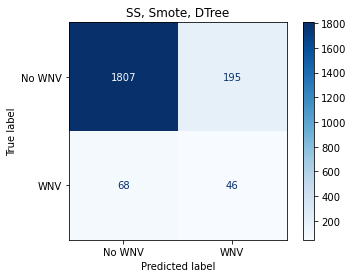

In [49]:
gs_model(gs_ss_smote_dt, 'SS, Smote, DTree')

**Observations:**

We observe a higher accuracy and specificity in our decision tree classifier model as compared to our logistic models. However, the results pale when we measure against our metrics of concern: sensitivity and roc_auc. To be noted that the decision tree classifiers had been optimized to produce the highest roc_auc. Comparing this model to our logistic-lasso regularized model, we find that our decision tree had made significantly higher 'negative' prediction (both true negative and false negative) at 88.6%, as compared to 70.4% in our logistic-lasso regularized model, creating a greater imbalance between 'true' and 'false' predictions.

#### Bagging Classifier

In [50]:
bag = BaggingClassifier()

pipe_ss_smote_bag = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('bag', bag)
])

pipe_ss_smote_bag_params = {
    'ss__with_mean': [True],  # False
    'ss__with_std': [True],   # False
    'smote__k_neighbors': [9], # 3, 5, 7, 11, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'bag__random_state': [42],
    'bag__max_features': [0.3], # 0.2, 0.4, 0.5, 0.75, 1.0
    'bag__n_jobs': [-1],
    'bag__max_samples': [0.6],    # 0.4, 0.5, 0.7, 0.8, 1.0
}

gs_ss_smote_bag = GridSearchCV(
    estimator=pipe_ss_smote_bag,
    param_grid=pipe_ss_smote_bag_params,
    scoring='roc_auc',
    cv=5
)

Model Best Params: {'bag__max_features': 0.3, 'bag__max_samples': 0.6, 'bag__n_jobs': -1, 'bag__random_state': 42, 'smote__k_neighbors': 9, 'smote__n_jobs': -1, 'smote__random_state': 42, 'smote__sampling_strategy': 'minority', 'ss__with_mean': True, 'ss__with_std': True}
Process took 0.0 minutes


,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738
"SS, Smote, DTree",87.6,90.3,40.4,0.653
"SS, Smote, Bag",86.6,88.9,46.5,0.677


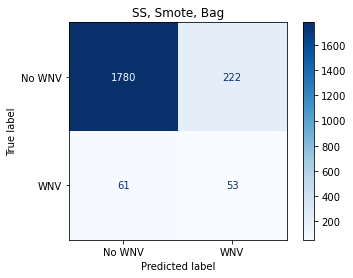

In [51]:
gs_model(gs_ss_smote_bag, 'SS, Smote, Bag')

**Observations:**


Bagging classifier models are similar to decision tree models that classifies our data based on its features and makes predictions on our test set based on the training set's branching decisions. However, bootstrapped models resamples observations in our models with replacement. This means that while the same techniques are used, the observations run into the algorithms will slightly differ due to the selection of resampled observations. In running our model, a bootstrap classifier essentially votes for the result of the outcome based on averaging the aggregate predictions, which allows our model to do better in the metrics we optimized: roc_auc.

Comparing this model to our decision tree model, the bagging model scored slightly better in sensitivity and roc_auc. We believe that this improvement can be attributed to the restriction of the bagging model in using a 60% max sample and 30% max features, as compared to the decision tree, which uses all samples and features available. This lowers the variance in the training set and better predicts our testing set.

Similar to our decision tree classifier model, we observe a higher accuracy and specificity in our bagging classifier model as compared to our logistic models. Similarly too, the results pale when we measure against our metrics of concern: sensitivity and roc_auc. To be noted our bagging classifiers had also been optimized for roc_auc. Comparing this model to our best model thus far (logistic-lasso regularized model), we find that our decision tree had made significantly higher 'negative' prediction (both true negative and false negative) at 87.0%, as compared to 70.4% in our logistic-lasso regularized model, creating a greater imbalance between 'true' and 'false' predictions.



#### XGBoost Classifier

In [52]:
xgboost = xgb.XGBClassifier()

pipe_ss_smote_xgb = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('xgb', xgboost)
])

pipe_ss_smote_xgb_params = {
    'ss__with_mean': [True], # False
    'ss__with_std': [True], # False
    'smote__k_neighbors': [5], # 3, 7, 9, 11, 13
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'xgb__random_state': [42],
    'xgb__n_jobs': [-1],
    'xgb__learning_rate': [0.1], # 0.04, 0.07, 0.2, 0.3
    'xgb__objective': ['binary:logistic'],
    'xgb__n_estimators': [60], # 20, 40, 80, 100, 300, 500
    'xgb__eval_metric': ['auc']
}

gs_ss_smote_xgb = GridSearchCV(
    estimator=pipe_ss_smote_xgb,
    param_grid=pipe_ss_smote_xgb_params,
    scoring='roc_auc',
    cv=5
)

Model Best Params: {'smote__k_neighbors': 5, 'smote__n_jobs': -1, 'smote__random_state': 42, 'smote__sampling_strategy': 'minority', 'ss__with_mean': True, 'ss__with_std': True, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 60, 'xgb__n_jobs': -1, 'xgb__objective': 'binary:logistic', 'xgb__random_state': 42}
Process took 0.1 minutes


,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738
"SS, Smote, DTree",87.6,90.3,40.4,0.653
"SS, Smote, Bag",86.6,88.9,46.5,0.677
"SS, Smote, XGBoost",88.9,91.2,49.1,0.702


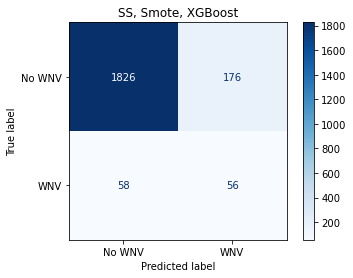

In [53]:
gs_model(gs_ss_smote_xgb, 'SS, Smote, XGBoost')

**Observations:**

A boosted model uses a subset of features to repeatedly train the model and gradually produce better models in each learning iteration. Unlike a decision tree, a boosted model is shallow and combines weak learners into stronger learners by updating the importance of a non-misclassified feature into the next modeling iteration. This allows a model to continually increase its predictive power while still avoiding an overfitting to the training set. 

Compared to our previous tree-based models, our boosted model performed better on all of our relevant metrics: sensitivity and roc_auc. Similar to before, we have optimized for roc_auc in this model as well. While our boosted model had predicted a higher proportion of our test set to be 'negative' (89.0%, as compared to 88.6% and 87.0% for our decision tree and bagging model respectively), the usage of shallower trees to sequentially train our model had allowed our model to increase its predictive power. This is the best out of all of our tree-based models thus far.

**Feature importance:**

In [54]:
xgb_feat_impt = pd.DataFrame(gs_ss_smote_xgb.best_estimator_['xgb'].feature_importances_, index=kaggle_X.columns)
xgb_feat_impt.rename(columns={0: 'feature_importance'}, inplace=True)
xgb_feat_impt.sort_values(by='feature_importance', ascending=False).head()

,feature_importance
sunset,0.265326
sunrise,0.162277
species_nr,0.085531
addressaccuracy,0.050645
year,0.048792


Looking at the top 5 feature importances in our xgboost models, we find that sunset and sunrise time has the highest effect among all features used. This is similar to our previous finding during data cleaning which suggests that mosquito life cycles and activities are affected by  sunrise/sunset times. Our third most important feature is the species, and this makes sense given the rates at which our higher ordinal value species shows a higher rate of testing for WNV as compared to the species with lower ordinal value.

### Analysis of All Feature Reduction Models

#### Metric Comparison

In [55]:
result.set_index('Model')

,Accuracy,Specificity,Sensitivity,ROC_AUC
Model,,,,
"SS, Smote, Logit-Ridge",72.5,72.5,73.7,0.731
"SS, Smote, Logit-Lasso",73.1,73.0,74.6,0.738
"SS, Smote, DTree",87.6,90.3,40.4,0.653
"SS, Smote, Bag",86.6,88.9,46.5,0.677
"SS, Smote, XGBoost",88.9,91.2,49.1,0.702


To end this section, we compare all of our feature reduction models. To recap, feature reduction was done to prevent our models from overfitting to our training set. We then ran two types of classification methods: logistic-based and tree-based classifiers. The main difference between our logistic and tree classifiers are in its nature in using the input features. Whereas a logistic classifier model penalizes features and prevents an overfitting, tree-based classifiers are greedy learners which utilizes as many features as possible. 

To conclude, our logistic classifier models had generally performed better than our tree-based classifier models in our metric of concern: sensitivity and roc_auc. As such, we believe that thus far, our logistic models would better fit the need of predicting the WNV.

#### Plot ROC-AUC

In [56]:
def plot_all_auc(models):
    fig, ax = plt.subplots(figsize=(10,10))
    axes = {}
    for i, m in enumerate(models.keys()):
        axes[f'ax{i}'] = plot_roc_curve(m, X_test, y_test, ax=ax, name=models[m])
        
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.title('ROC-AUC curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()

In [57]:
models_built = {
    gs_ss_smote_logit_ridge: 'Logit Ridge',
    gs_ss_smote_logit_lasso: 'Logit Lasso',
    gs_ss_smote_dt: 'Decision Tree',
    gs_ss_smote_bag: 'Bagging',
    gs_ss_smote_xgb: 'xgboost',
}

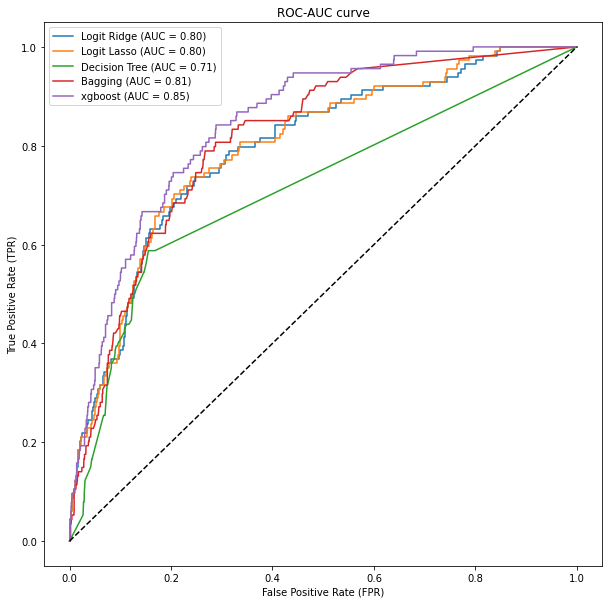

In [58]:
plot_all_auc(models_built)

**ROC Comparison**

Plotting the graphs above, we find that our xgboost model performed better than our logistic models. Tree-based models are prone to overfitting due to its greedy nature. This means that a tree-based model prefers maximizing the depth of its branches. However, by using xgboost, we limit the greediness of the model such that the models are created using shallower trees (stumps), and trained through learning each iteration's misclassifications. As such, a boosted model allows the model to be trained with less variance (less overfitting).


**Final Model Selection**


|Model|Sensitivity|ROC_AUC|AUC|Model Selected?|
|-----|-----------|-------|---|---------------|
|Logistic-Ridge|0.737|0.731|0.80|
|<font color=blue>Logistic-Lasso|<font color=blue>0.746|<font color=blue>0.738|<font color=blue>0.80|<font color=blue><center>Yes</center>|
|Decision Tree|0.404|0.653|0.71|
|Bagging|0.465|0.677|0.81|
|<font color=blue>XGBoost|<font color=blue>0.491|<font color=blue>0.702|<font color=blue>0.85|<font color=blue><center>Yes</center>|


**Selected models are colorized <font color=blue>BLUE</font> for better readability.**

### Run Model for Kaggle

This section provides a function to run our feature reduction models and test it against the Kaggle testing set. 

In [59]:
def kaggle_test(gs_model):
    y_pred = gs_model.best_estimator_.predict_proba(kaggle_X)

    kaggle_submit = test[['id']]
    kaggle_submit['WnvPresent'] = pd.DataFrame(y_pred[:,1])
    kaggle_submit.set_index('id', inplace=True)
    
    return kaggle_submit


In [60]:
kaggle_submit = kaggle_test(gs_ss_smote_logit_ridge)
kaggle_submit.to_csv(r'../data/gs_ss_smote_logit_ridge.csv')
kaggle_submit = kaggle_test(gs_ss_smote_logit_lasso)
kaggle_submit.to_csv(r'../data/gs_ss_smote_logit_lasso.csv')
kaggle_submit = kaggle_test(gs_ss_smote_dt)
kaggle_submit.to_csv(r'../data/gs_ss_smote_dt.csv')
kaggle_submit = kaggle_test(gs_ss_smote_bag)
kaggle_submit.to_csv(r'../data/gs_ss_smote_bag.csv')
kaggle_submit = kaggle_test(gs_ss_smote_xgb)
kaggle_submit.to_csv(r'../data/gs_ss_smote_xgb.csv')

## Feature extraction 


### Polynomial Features

Any of the features could be related to each other, or have an interactive effect with each other. Any synergistic effect on wnvpresent could increase the significant predictive power to the model. 


In [61]:
# 'nummosquitos' was removed from polynomial features because it is not a feature in the test set
# 'date' was removed as we extracted the 'week', 'year' from it.
X = train.drop(columns=['date','wnvpresent','nummosquitos'])
y = train['wnvpresent']


In [62]:
# Generating the polynomial features table.  
# instantiate
poly = PolynomialFeatures(include_bias=False, degree=2)

# fit and transform the variables in the numerical dataframe
X_poly = poly.fit_transform(X)
X_poly.shape

# Checking column names to all polynomial features
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X.columns))

# Generating list of poly feature correlations
X_poly_corrs = X_poly.corrwith(y)

# Shows top 40 features most positively correlated with wnvpresent
X_poly_corrs.sort_values(ascending=False).head(40)

addressaccuracy trap_rank      0.915657
latitude trap_rank             0.912398
trap_rank year                 0.912283
trap_rank                      0.912233
trap_rank sealevel             0.912162
trap_rank stnpressure          0.912148
trap_rank sunset               0.911941
trap_rank week                 0.910168
trap_rank sunrise              0.908579
trap_rank tavg                 0.907355
trap_rank tmin                 0.907185
trap_rank wetbulb              0.907144
trap_rank lag_2_tavg           0.906520
trap_rank tmax                 0.906483
trap_rank dewpoint             0.904773
trap_rank lag_1_tavg           0.904692
trap_rank avgspeed             0.871990
species_nr trap_rank           0.853837
trap_rank resultspeed          0.827764
trap_rank resultdir            0.821981
trap_rank temp_diff            0.792499
trap_rank^2                    0.579206
trap_rank depart               0.571068
trap_rank preciptotal          0.474681
trap_rank TS                   0.461440


The above showed that the highest correlation seemed to be location (trap_rank and addressaccuracy) related. From EDA, we already know that trap_rank has high correlation, and might not be necessary to add another feature related to trap_rank. In addition, nummosquitoes is not in the test set. So we think adding more features related to temperature such as 'species_nr dewpoint', 'tmin sunrise', 'wetbulb sunrise' would increase the predictive power of our model.

It is also important to note features that might have the highest negative impact on wnvpresent. The below list shows that longitude and sunset might have decrease/discourage the presence of wnvpresent. 


In [63]:
# Shows bottom 20 features most positively correlated with wnvpresent
X_poly_corrs.sort_values(ascending=False).tail(20) 

longitude TS           -0.056869
sunset year            -0.057391
sunset                 -0.059019
sunset stnpressure     -0.060200
sunset sealevel        -0.060779
longitude tmax         -0.061344
sunset^2               -0.061918
longitude depart       -0.065620
longitude              -0.076600
longitude FG           -0.077753
longitude temp_diff    -0.078773
longitude tavg         -0.079429
longitude year         -0.080058
longitude tmin         -0.090030
longitude wetbulb      -0.092972
longitude dewpoint     -0.095661
longitude sunrise      -0.098397
longitude week         -0.101082
species_nr longitude   -0.125671
longitude trap_rank    -0.912227
dtype: float64

In [64]:
# Adding interaction features into train set
train['species_nr*dewpoint'] = train['species_nr'] * train['dewpoint']
train['tmin*sunrise'] = train['tmin'] * train['sunrise']
train['wetbulb*sunrise'] = train['wetbulb'] * train['sunrise']

In [65]:
# final train set
train.head()

,date,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,...,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,species_nr*dewpoint,tmin*sunrise,wetbulb*sunrise
0,2007-05-29,1.0,41.688324,-87.676709,8,1,0,0,88.0,62.5,...,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,58.5,26312.5,27575.5
1,2007-05-29,1.0,41.720848,-87.666014,9,3,0,0,88.0,62.5,...,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,58.5,26312.5,27575.5
2,2007-05-29,1.0,41.731922,-87.677512,8,5,0,0,88.0,62.5,...,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,58.5,26312.5,27575.5
3,2007-05-29,1.0,41.732984,-87.649642,8,1,0,0,88.0,62.5,...,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,58.5,26312.5,27575.5
4,2007-05-29,1.0,41.862292,-87.648860,8,1,0,0,88.0,62.5,...,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,58.5,26312.5,27575.5


In [66]:
# Adding interaction features into test set
test['species_nr*dewpoint'] = test['species_nr'] * test['dewpoint']
test['tmin*sunrise'] = test['tmin'] * test['sunrise']
test['wetbulb*sunrise'] = test['wetbulb'] * test['sunrise']


### Exploring PCA-transformed data

For feature extraction, we can use PCA to identify and keep those potential important relationships, before performing the predictions/models. Due to the number of features (and high-dimensional manifold) in our dataset, PCA was utilised to perform an unsupervised dimensionality reduction on the training dataset. In such a way, PCA will provide the best linear approximations before modeling and prediction was performed ([source](https://arxiv.org/ftp/arxiv/papers/1403/1403.1949.pdf)). GridSearchCV is used to set the dimensionality of the PCA. 

In [67]:
X = train.drop(columns=['date','wnvpresent','nummosquitos'])
y = train[['wnvpresent']]

In [68]:
X.shape

(8461, 31)

In [69]:
# split again, just to make sure
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify =y)

# scaling
ss_pca = StandardScaler()

X_train_sc = ss_pca.fit_transform(X_train)
X_valid_sc = ss_pca.transform(X_valid)

In [70]:
# Instantiate PCA.
# up to n_components were tested
pca = PCA(n_components = 10)

# Fit PCA on the training data.
pca.fit(X_train_sc)

PCA(n_components=10)

In the below pipeline, PCA will perform unsupervised dimensionality reduction on the training data before upsampling it. This is so that upsampling will only be performed on the reduced dimensional manifold and not on the entire dataset. The models for the prediction will be done last. In the below pipeline, the logistic regression model was utilised. 

In [71]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('pca', PCA()),
        ('sampling', SMOTE()),
        ('logreg', LogisticRegression(max_iter=1_000, solver='saga'))
    ])

In [72]:
pipe_params = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
} 

In [73]:
grid = GridSearchCV(pipe, pipe_params, scoring='roc_auc', n_jobs=-1)

In [74]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA()), ('sampling', SMOTE()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

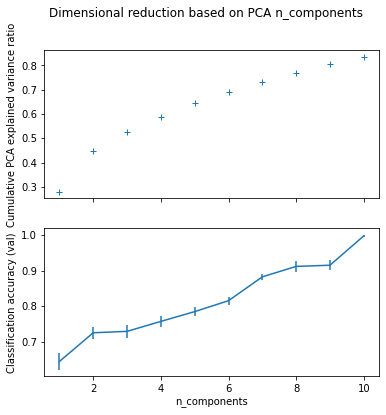

In [75]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py
# Plot search for best combination of PCA n_components and logistic regression accuracy
# pca.fit(X_train_sc)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_.cumsum(), '+', linewidth=10)
ax0.set_ylabel('Cumulative PCA explained variance ratio')

results = pd.DataFrame(grid.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components');
plt.suptitle('Dimensional reduction based on PCA n_components');

In [76]:
print(f'Cumulative explained variance (for n_components=9): {pca.explained_variance_ratio_.cumsum()[9]}')

Cumulative explained variance (for n_components=9): 0.8350762443564184


In [77]:
grid.best_params_

{'pca__n_components': 10}

In [78]:
grid.score(X_train, y_train), grid.score(X_valid, y_valid)

(0.9998409285385172, 1.0)

GridSearchCV chose n_components=10, however, there was overfitting at n_components=10. Since PCA utilises n_components, the decision is to use n_components=9, to minimise overfitting, and we would retain approximately 83% of the variability in the data.
<br>
<br> The curse is after the dataset is PCA-transformed, there is no correlation between any features. In addition, the new principal components are not interpretable. So, to dig into the feature importance, one will have to convert the PCA-transformed data back to the original features.

### Loop models

In [79]:
# Instantiate models
models = {'lr': LogisticRegression(max_iter=1000, solver='saga'),
        'dt': DecisionTreeClassifier(),
        'rf': RandomForestClassifier(),
        'et': ExtraTreesClassifier(),
        'svc': SVC(probability=True),
        } 

In [80]:
def run_models(model, model_params):
    pipe = Pipeline([
            ('scale', StandardScaler()),
            ('pca', PCA(n_components = 9)),
            ('sampling', SMOTE(sampling_strategy = 'minority')),
            (model, models[model])
            ])
    
    grid = GridSearchCV(pipe, param_grid=model_params, cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    # metrics
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_valid, y_valid)
    preds = grid.predict(X_valid)
    tn, fp, fn, tp = confusion_matrix(y_valid, preds).ravel()
  
    # View confusion matrix
    plot_confusion_matrix(grid, X_valid, y_valid, cmap='Blues', values_format='d');
    
    # Calculate the sensitivity/ recall
    sens = tp / (tp + fn)
    
    # Calculate the specificity
    spec = tn / (tn + fp) 
    
    # print results
    print(f'Best params: {grid.best_params_}')
    print(f'Training score: {round(train_score, 4)}')
    print(f'Test score: {round(test_score, 4)}')
    print(f'Recall: {round(sens, 4)}')
    print(f'Specificity: {round(spec, 4)}')
    return grid

**Logistic Regression**

Best params: {'lr__C': 1, 'lr__penalty': 'l1', 'sampling__k_neighbors': 200}
Training score: 0.9172
Test score: 0.9316
Recall: 0.8278
Specificity: 0.8565


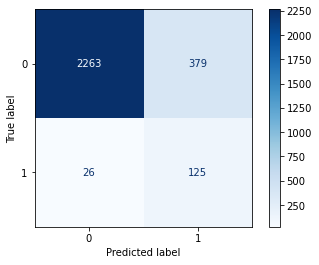

In [81]:
# logistic regression
grid_params = {
    'sampling__k_neighbors': [150, 200, 250],  
    'lr__penalty': ['l1', 'l2',  'elasticnet'],   
    'lr__C': [0.1, 1, 10]  
} 

best_params = {
    'sampling__k_neighbors': [200],  
    'lr__penalty': ['l1'],   
    'lr__C': [1]  
}

lr = run_models('lr', best_params)

There was little change in tuning the hyperparameters for the logistic regression. There might be an issue with underfitting, since training score < test score. However, it is uncertain (for now) if one of the ways to combat this is to decrease or increase the sampling strategy, since recall was affected, despite having good training and test scores. 'saga' was selected as the 'solver' since it supports several penalties. 'none' was not provided as an option due to tendency of getting training scores = 1.0. So applying regularisation did help to minimise overfitting.

**Decision Tree Classifier**

Best params: {'dt__max_depth': 50, 'dt__min_samples_leaf': 100, 'dt__min_samples_split': 15, 'sampling__k_neighbors': 15}
Training score: 0.9769
Test score: 0.9519
Recall: 0.8344
Specificity: 0.9561


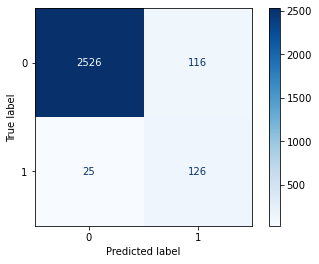

In [82]:
# decision tree classifier
grid_params = {
    'sampling__k_neighbors': [15, 20, 25],  
    'dt__max_depth': [40, 45, 50],
    'dt__min_samples_split': [10, 15, 20],
    'dt__min_samples_leaf': [100, 150, 200],
} 

best_params = {
    'sampling__k_neighbors': [15],  
    'dt__max_depth': [50],
    'dt__min_samples_split': [15],
    'dt__min_samples_leaf': [100],
} 

dt = run_models('dt', best_params)

I do not understand the popularity of decision trees, due to its tendency to overfit, and efforts spent on tuning the parameters to ensure that training score=1.0 does not occur. The hyperparameters are relatively higher (than what I had previously seen), but this was due to training score = 0.999. 'max_depth' is the maximum depth of the tree, where default=None. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. Since GridSearchCV chooses the estimator based on the highest score, one will have to provide restricted ranges such that training score = 0.999 does not occur. 
<br> 
<br> In most parts during hyperparameter selection, there was a balance between providing certain values for GridSearch to tune, such that the higher value of maximum depth does not result in overfitting, and a lower value does not result in underfitting. *(Personal opinion)* higher values should be provided to min_samples_split and min_samples_leaf, however, recall and specificity were penalised/reduced. 

**Random forest classifier**

Best params: {'rf__max_depth': 10, 'rf__min_samples_leaf': 100, 'rf__min_samples_split': 20, 'rf__n_estimators': 35, 'sampling__k_neighbors': 20}
Training score: 0.9839
Test score: 0.9665
Recall: 0.8212
Specificity: 0.9523


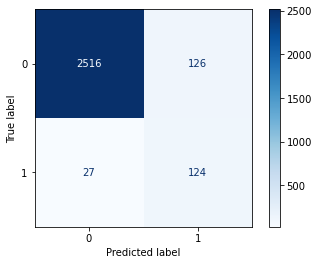

In [83]:
# random forest classifier
grid_params = {
    'sampling__k_neighbors': [15, 20, 25], 
    'rf__n_estimators': [30, 35, 40],
    'rf__max_depth': [10, 15, 20],
    'rf__min_samples_split': [10, 15, 20],
    'rf__min_samples_leaf': [100, 150, 200],
} 

best_params = {
    'sampling__k_neighbors': [20], 
    'rf__n_estimators': [35],
    'rf__max_depth': [10],
    'rf__min_samples_split': [20],
    'rf__min_samples_leaf': [100],
} 

rf = run_models('rf', best_params)


Ensemble methods are better than simple/one decision tree, due to less probability of overfitting. However, similarly to decision tress (and not totally unexpected), the hyperparameters were relatively higher, but this was due to training score = 0.999. Also (and not totally unexpected), pre-pruning to stop GridSearchCV from growing/cutting down trees was necessary to prevent overfitting. Increasing 'max_depth' would produce better scores; This is not necessary surprising as deeper trees allowed the capture of more information, however, it also increases the likelihood of overfitting. Increasing 'min_samples_leaf' and 'min_samples_split' were essential to ensure that the classifier does not keep splitting the dataset to be more 'pure'. However, there seems to be less issue with recall and specificity in the decision tree and random forests classifiers, compared to logistic regression.

**Feature importance**

While PCA is not a classifier and one does not necessarily need to PCA-transform data to get good results, it is important to note that PCA **can** be useful when one has a dataset with high dimensionality. Being able to identify the dimensions first before applying a classifier, may help to discriminate between the classes better. Here, the Random Forest classifier is used to determine the gini importance of the n_components=9, and each feature is plotted below. 

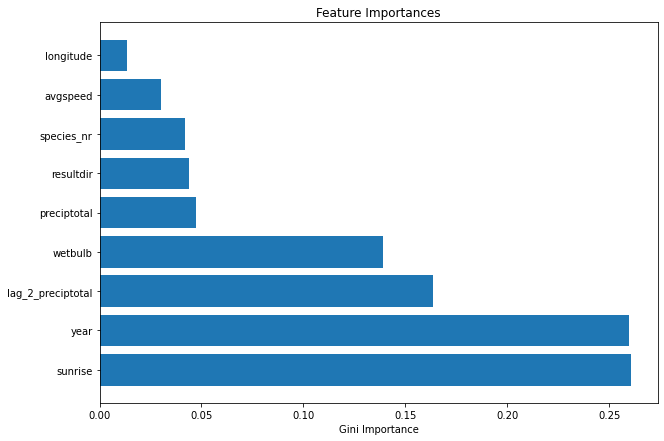

In [84]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
# PCA-transform data back to orignal features
num_plot = 9

pipe = Pipeline([
            ('scale', StandardScaler()),
            ('pca', PCA(n_components = num_plot)),
            ('sampling', SMOTE(sampling_strategy='minority', k_neighbors=200)),
            ('rf', RandomForestClassifier(n_estimators=350, max_depth=50, min_samples_split = 200, min_samples_leaf = 100)),
            ])

pipe.fit(X_train, y_train)

model = pipe.steps[1][1]
n_pcs = model.components_.shape[0]

# get index for more important feature from each n_component
feature_names = X_train.columns
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

# combine for plotting later
zipped_feats = zip(most_important_names, pipe.steps[3][1].feature_importances_)
zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=True)
features, importances = zip(*zipped_feats)

# n_components = 9
top_features = features[:num_plot]
top_importances = importances[:num_plot]
plt.figure(figsize=(10,7))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), top_features)
plt.title('Feature Importances')
plt.xlabel('Gini Importance')
plt.show() 

In [85]:
# explained variance attribute of each prinicipal component
pipe.steps[1][1].explained_variance_ratio_

array([0.27970555, 0.16607017, 0.0812244 , 0.06197712, 0.05666677,
       0.04404601, 0.0407477 , 0.03833562, 0.03544519])

The above plots show the nine highest performing predictors. The explained variance ratio provides the information (variance) that is captured by each principal component. So, 'year' explains approximately 28% of the variance in the dataset. 'Sunrise' explains approximately 17% of the variance in the dataset. As demonstrated earlier, n_components=9, could explain approximate 80% of the variability in the dataset.

**year** was a surprise feature. And on hindsight, should have been dropped, if not because we were relying on PCA to transform our entire dataset. How does the year explain 28% of the variability in the dataset? It could be that learning from the past, will bring about wisdom and understanding in the future. During EDA, it was shown that years 2007 and 2013 are years with the highest presence wnv detected. In 2007, a large amount of rain and hot weather produced favourable conditions for eggs ([source](https://www.cmaj.ca/content/177/12/1489.1)). In 2012/2013, was the deadliest year for the wnv in the US due to higher than normal temperatures, and sustained interactions between mosquito and birds (which are reservoir hosts for wnv) ([source](https://www.nbcnews.com/healthmain/2012-was-deadliest-year-west-nile-us-cdc-says-1c9904312))
<br>
<br> **Sunrise** was not a surprise since mosquitoes are most active around the time of sunrise ([source](https://portal.ct.gov/Mosquito/Press-Room/2020-Press-Releases/DPH-Announces-Three-New-Cases-of-West-Nile-Virus-Infection-in-Fairfield-County.)). 
<br>
<br> **lag_2_preciptotal** and **preciptotal** were not surprising features either, since increased precipitation have a lagged effect on wnvpresent ([source](https://pubmed.ncbi.nlm.nih.gov/30145430/)). However, we were expecting more lagged features from temperatures as well.
<br>
<br> **wetbulb** was also discussed in EDA. Since wetbulb takes into account both precipitation and temperature, it has demonstrated to have a higher predictive power since it is a feature engineered through combining temperature and precipitation ([source](https://www.theweatherprediction.com/habyhints/259/)).
<br>
<br> **resultdir** is the resultant wind direction, measured to whole degrees, based on a 360 degree compass (with 0 or 360 degrees from the North). **avgspeed** is the average wind speed. While one would expect higher temperatures and rainfall to dominant the feature importances, it seems *where* and *how fast* the wind is blowing could also be important features. This could be related to FG (fog column)([source](https://www.sciencedaily.com/releases/2012/11/121119104522.htm)), since the spread of wnv requires the mosquitoes to be well conditioned or aided (by wind) for flight.
<br>
<br> We have discussed the top 2 **species_nr** culex pipiens, culex restuans that are responsible for the spread of the wnv in our EDA.
<br>
<br> **longitude** is related to location and possibly where the traps were being placed.


**Extra trees classifier**

Best params: {'et__max_depth': 4, 'et__min_samples_leaf': 10, 'et__min_samples_split': 15, 'et__n_estimators': 30, 'sampling__k_neighbors': 20}
Training score: 0.9331
Test score: 0.9278
Recall: 0.8477
Specificity: 0.8274


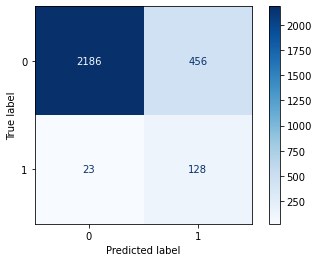

In [86]:
# extra trees classifier
grid_params = {
    'sampling__k_neighbors': [15, 20, 25],
    'et__n_estimators': [30, 35],
    'et__max_depth': [4, 5, 6],
    'et__min_samples_split': [10, 15],
    'et__min_samples_leaf': [10, 15],
} 

best_params = {
    'sampling__k_neighbors': [20],
    'et__n_estimators': [30],  
    'et__max_depth': [4],  
    'et__min_samples_split': [15],
    'et__min_samples_leaf': [10],
}

et = run_models('et', best_params)


Extra trees implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset. It should improve the accuracy while control for over-fitting. So far, this has been true; The number of trees are fewer, and do not need to be deep (max_depth) to produce good scores. Increasing the n_estimators also increased the accuracy, but up to a certain point (in this case, 30 trees). min_samples_split and min_samples_leaf do not have to be large to avoid overfitting. Feature importance was not performed because n_components=9 was used for all the models using PCA-transformed data, and they are the same 9 features. *(Preliminary analysis found that sunrise and year would fight to be top dog in the different models, but that was just a small difference)*

**Support Vector Classification**

Best params: {'sampling__k_neighbors': 250, 'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Training score: 0.9249
Test score: 0.9346
Recall: 0.8344
Specificity: 0.8573


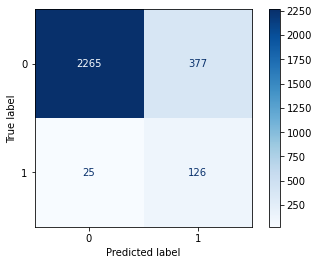

In [87]:
# Support Vector Classification
grid_params = {
    'sampling__k_neighbors': [250, 300],     
    'svc__kernel': ['linear', 'sigmoid'],   
    'svc__gamma' : ['scale', 'auto'], 
    'svc__C': [1 ,5 ,10] 
} 

best_params = {
    'sampling__k_neighbors': [250],     
    'svc__kernel': ['linear'],    
    'svc__gamma' : ['scale'],
    'svc__C': [1] 
} 

svc = run_models('svc',  best_params)

In the above, hyperparameters tuned were the kernel, gamma and regularization parameter. 'rbf' and 'poly' were not provided as options, as there were instances where training score=0.99 (dependent on other parameters). Choosing an optimal gamma was important too, since the parameter controls overfitting; The higher the gamma, the higher the hyperplane to match the training data. A regularization parameter C represents the tradeoff between a smoother hyperplane and misclassifications. In summary, SVM is known to work well with non-linear data, is simple to implement, and provided high accuracy. However, it requires a lot of training time compared to other algorithms. 

### Analysis of All Feature Extraction Models

#### Metric Comparison

|                           | ROC_AUC | Sensitivity | Specificity |
|---------------------------|---------|-------------|-------------|
| Logistic regression       | 0.93    | 0.83        | 0.86        |
| Decision Tree classifier  | 0.94    | 0.81        | 0.94        |
| Random Forest classifier  | 0.97    | 0.83        | 0.95        |
| Extra Trees classifier    | 0.93    | 0.87        | 0.85        |
| Support Vector classifier | 0.93    | 0.82        | 0.86        |

#### Plot ROC-AUC 

In [88]:
def plot_all_auc(models):
    fig, ax = plt.subplots(figsize=(10,10))
    axes = {}
    for i, m in enumerate(models.keys()):
        axes[f'ax{i}'] = plot_roc_curve(m, X_valid, y_valid, ax=ax, name=models[m])
        
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.title('ROC-AUC curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()

In [89]:
models_built = {
    lr : 'LogisticRegression', 
    dt : 'DecisionTreeClassifier',
    rf : 'RandomForestClassifier',
    et : 'ExtraTreesClassifier',
    svc : 'SVC',
} 

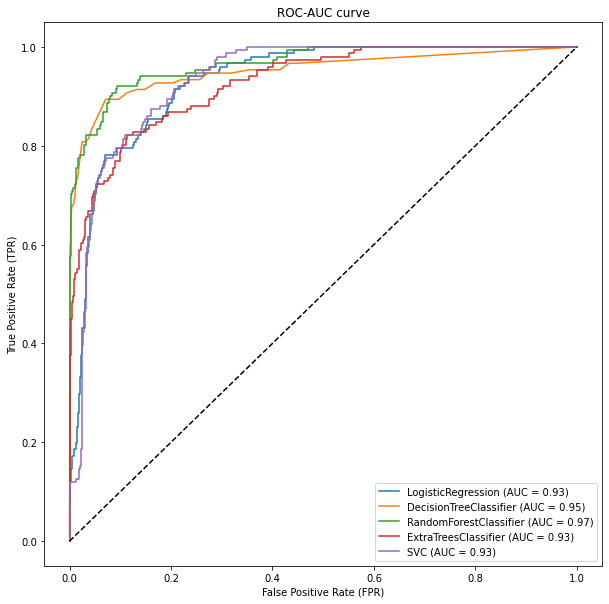

In [90]:
plot_all_auc(models_built)

From the above ROC-AUC curve, the Random Forest classifier has the highest AUC score, ie., it is better at predicting classes or distinguishing between the classes. So the Random Forest model also presents the best performing trade-off between the true positives and true negatives. In addition, the model has a recall rate at 0.83, and specificity at 0.95. Therefore, using PCA-transformed data, **the Random Forest model was selected as the chosen model.**
<br>
<br> At FPR=1, where sensitivity is the highest, all classifiers seemed to performed well till FPR=0.8. Below this point, the decision tree (dt) classifier starts to exhibit lower sensitivity, with the lowest sensitivity (=0.81) reported among all the models. Given the tendency for dt to overfit, the parameters were tuned such that a training score = 0.999 did not occur, however, sensitivity was also penalised. At FPR=0, where specificity is the highest, the sudden decrease in logistic regression showed that the model, together with SVC have the lowest specificity.
<br>
<br> Due to excessive restrictions on overfitting, some models exhibited underfitting. Perhaps depending on PCA to reduce the dimension and transform the data restricted/prevented the model from learning and understanding the complexities of the dataset. In this case, between underfitting and overfitting, the decision here was to restrict overfitting. Due to the multicollinearity of the data, for example, in the weather dataset, where most (if not all) of the dataset are close cousins of each other, the data used should be simplified and this will also enable use of a less complex model. If one can utilise a better dataset with more information on spraying, then this will justify the use of a more complex model.

## Run Model for Kaggle

In [91]:
test.head()

,id,date,latitude,longitude,addressaccuracy,species_nr,trap_rank,tmax,tmin,tavg,...,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,species_nr*dewpoint,tmin*sunrise,wetbulb*sunrise
0,1,2008-06-11,41.95469,-87.800991,9,2.0,0,86.0,63.5,74.75,...,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,111.0,26416.0,26624.0
1,2,2008-06-11,41.95469,-87.800991,9,1.0,0,86.0,63.5,74.75,...,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,55.5,26416.0,26624.0
2,3,2008-06-11,41.95469,-87.800991,9,3.0,0,86.0,63.5,74.75,...,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,166.5,26416.0,26624.0
3,4,2008-06-11,41.95469,-87.800991,9,0.0,0,86.0,63.5,74.75,...,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,0.0,26416.0,26624.0
4,5,2008-06-11,41.95469,-87.800991,9,0.0,0,86.0,63.5,74.75,...,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,0.0,26416.0,26624.0


In [92]:
# drop columns
X_test = test.drop(columns=['id','date'])

# check that shape is same to train dataset
X_test.shape

(116293, 31)

In [93]:
X = train.drop(columns=['date','wnvpresent','nummosquitos'])
y = train[['wnvpresent']]

In [94]:
# arrange columns to match
X = X[X_test.columns]

In [95]:
def run_test(model, model_params):
    pipe = Pipeline([
            ('scale', StandardScaler()),
            ('pca', PCA(n_components = 9)),
            ('sampling', SMOTE()),
            (model, models[model])
            ])
    
    grid = GridSearchCV(pipe, param_grid=model_params, scoring='roc_auc', n_jobs=-1)
    grid.fit(X, y)

    train_score = grid.score(X, y)
#     preds = grid.predict(X_test)
    pred_prob = grid.predict_proba(X_test)
    
    print(f'Training score: {round(train_score, 4)}')
    return pred_prob

In [96]:
# Random Forest Classification
best_params = {
    'sampling__k_neighbors': [20], 
    'rf__n_estimators': [35],
    'rf__max_depth': [10],
    'rf__min_samples_split': [20],
    'rf__min_samples_leaf': [100],
} 

y_pred = run_test('rf', best_params)

Training score: 0.9909


In [97]:
# kaggle score = 0.61
kaggle_rf = test[['id']]
kaggle_rf['wnvpresent'] = pd.DataFrame(y_pred[:,1])

**Save predicted results as csv file for kaggle submission.**

In [98]:
kaggle_rf.to_csv('../data/kaggle_rf.csv',index=False)

# Predicted locations

The predictions were based on our model of choice which was selected from models built on feature reduction. This is because feature reduction allowed us to filter irrelevant or redundant features based on domain knowledge; It is a relatively safer technique to ensure that the features that have been 'proven' to possess high predictive power to be included in the model. 

In [99]:
# Setting up predictions in a dataframe for merging
predictions = pd.DataFrame(gs_ss_smote_xgb.best_estimator_.predict(kaggle_X)).reset_index()
predictions['index'] = predictions['index'] + 1
predictions = predictions.rename(columns={0: 'predictions', 'index': 'id'})

# Setting up test for merging
plot_map = test[['id', 'latitude', 'longitude', 'week']]

# Merging plot_map and predictions
plot_map = pd.merge(
    left=plot_map,
    right=predictions,
    left_on='id',
    right_on='id'
)

# Selecting only the areas which are predicted to have WNV
plot_map_positive = plot_map.loc[plot_map['predictions'] != 0]

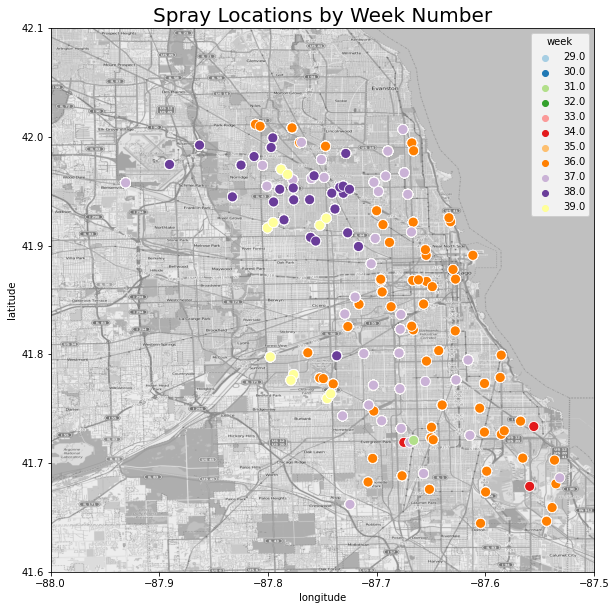

In [100]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# # Uncomment below and adjust week_num to find spray location of said week.
# week_num = -insert week number-
# plot_week = plot_map_positive.loc[plot_map_positive['week'] == week_num]
# lats = plot_week['latitude']
# longs = plot_week['longitude']
# hue = plot_week['week']

lats = plot_map_positive['latitude']
longs = plot_map_positive['longitude']
hue = plot_map_positive['week']

plt.figure(figsize=(10,10))

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x=longs, y=lats, 
                palette='Paired', 
                hue=hue,
                legend='full', 
                s=100,
               )

plt.title('Spray Locations by Week Number', size=20)

plt.savefig('map_predict.png')

The above map shows the overall spray areas for weeks 29 to 39. The graph colours segregate the week numbers to which the sprays should be done on each location. Note that some areas are overlapping, and thus the map should be adjusted to find each weekly spray location. We have commented out a few lines of code for the user to input their week of interest and find the spray locations.

# Conclusions

Our client requested for us to provide suggestions of when and where to spray for mosquitoes which have the West Nile Virus in order to decrease their city's rate of infection and death rate. We recommend that pesticides be deployed in inner suburbs (refer to map above), and that older housing (built in the 40s-60s) be given priority due to their older sewer systems which are favourable breeding grounds for mosquito breeding. Furthermore, we recommend that spraying should be done 14 days earlier given that there is a max 14-day WNV incubation period. 

The model of choice was selected from models built on feature reduction. This is because feature reduction allowed us to filter irrelevant or redundant features based on domain knowledge; It is a relatively safe technique to ensure that the features that have been 'proven' to possess high predictive power to be included in the model. 

We iterate some of our findings to conclude our findings.

1. Due to an imbalanced target class, Smoting was necessary to reduce such imbalance and provide the model with more balanced data.
2. Our logistic based models generally performed better than our fancier tree-based classifiers due to a tree-based model
3. However, using a boosted model is preferrable to a logistic model due to its ability to train with less overfitting as compared to other tree-based models and producing a better ROC.


**Models selected:** Smoted Logistic Lasso Model and Smoted XGBoost Model

|Model|Sensitivity|ROC_AUC|AUC|Kaggle Score|
|-----|-----------|-------|---|------------|
|Logistic-Lasso|0.746|0.738|0.80|0.72469|
|XGBoost|0.491|0.702|0.85|0.75119|

Our smoted logistic model penalized using lasso regularization was selected due to several reasons:

1. Higher ROC_AUC and Sensitivity Scores
2. Faster computational time

We also select our smoted XGBoost model due to the following reasons:

1. Less overfitting as compared to our tree-based models
2. Highest AUC score.


We find that models based on tree-based classifiers such as decision trees, bagging and boosting performed much worse than our logistic-based classification models. The worse performance can be attributed to the nature of tree-based classifiers. Tree-based classifiers are greedy algorithms that tend to overfit. On the other hand, logistic-based regressions that have been penalized with L1 and/or L2 regularization do not suffer from the same problem of overfitting. While optimization of tree-based classifiers can decrease variance, they do not perform as well as other models that we are using. As such, we believe that the logistic models are generally more reliable than the tree-based models.

However, our boosted model performed better than our logistic models. The reason is that a boosted model trains in such a way that prevents overfitting due to its usage of shallower trees. As such, it is able to perform better than other tree models as it relies continually improves itself through the changing weights of the models on each iteration. A caveat to using boosted models: a boosted model requires more computational time than a logistic based model. Specifically, a boosted model will take the most time as one model is trained based on the previous model. As such, a boosted model cannot compute in a parallel manner and must instead be computed sequentially.

In determining the cost-effectiveness of deploying pesticides, we predicted that the economic impact of the 2013 WNV would cost approximately US\\$2,000,000 for 100 people requiring medical treatment. The costs for aerial spray is estimated to be US\\$815,355. Therefore, preventing WNV cases would not only save lives, but this will further avert economic costs (offsetting the cost of aerial spray). 

## Recommendations

We provide several recommendations on improving our model's predictive power, and other things that our client may take into consideration in their fight against the West Nile Virus.

**Short Term Recommendations:**

1. We recommend the collection and inclusion of additional relevant data such as:
    1. Population density
    2. Housing density
    3. Housing year built
    4. Sewage flow
    5. Increased number of traps 
    6. Humidity
    7. Sunlight duration
    8. Migratory patterns of birds (which are amplifying reservoirs/ hosts for WNV)

2. We recommend a cross-analysis of WNV cases in other states with similar weather patterns which also experience seasonal cases of WNV.

3. We recommend dropping the 'year' feature. Despite year being one of the feature importance in our model (after PCA-transform), the focus should be on weather conditions which will impede/encourage mosquitoes breeding and proliferation, rather than seasonal changes, even if present.

4. We recommend dummifying trap numbers instead of ranking them. While we had ranked the traps by groups based on the current amount of WNV mosquitos caught as we believe that it would provide much predictive power to our model, doing so may have been one of the causes of overfitting in our models. Dummifying trap ranks may provide a similar amount of predictive power while reducing variance.


**Long Term Recommendations:**

In the long term, our client should explore other alternative ways to fight against the West Nile Virus such as developing anti-WNV mosquitos. Modified mosquitos such as the modified [Aedes aegypti](https://www.webmd.com/a-to-z-guides/genetically-modified-mosquitoes) developed to combat against dengue, Zika, yellow fever and chikungunya are meant to prevent such diseases from occurring by introducing genetically engineered mosquitos to the population and disabling female offsprings from reproducing. This provides a targeted method of eliminating WNV-infected mosquitos which may grow resistant to the pesticides sprayed, and reduces the recurring annual cost of spraying pesticides.

**Creative (Humorous) Recommendation:**

In the mid-1300s, Europe was struck by the Bubonic Plague. More commonly known as the Black Death, the plague caused the death of millions of Europeans. In response to this, households were decreed to have a [cat to catch and kill](https://www.museumcenter.org/the-curious-curator/2018/7/16/black-cats-and-biological-warfare-the-history-of-the-plague) its main perpetuator: mice. Replicating the wisdom of the past, the governor could decree that every household must own a few frogs to eat the mosquitoes.

In 2020, China had faced a crisis plague which threatened regional food security - a Locust Plague. In response, China's government [enlisted 100,000 ducks](https://time.com/5791466/ducks-locust-plague/) to eat the locusts. On average, a single duck can eat 200 locusts in a day. This biological weapon used by China was more effective than utilizing pesticides that may threaten their crops. Similarly, the governor could introduce a large amount of frogs into the city to combat the WNV mosquitos.